In this exercise, we will use $\texttt{galpy}$ to investigate the gravitational potential of dark matter profiles in dwarf galaxies using the Jeans equations formulation for collisionless systems. We will use mock data based on Walker et al. (2009) https://iopscience.iop.org/article/10.1088/0004-637X/704/2/1274#apj320201s3. Dwarf galaxies are $>90\%$ dark matter, so we can assume the gravitational potential is only given by dark matter density profile.

In [1]:
import matplotlib.pyplot as plt
import time
import numpy as np
import galpy
from galpy.df import jeans

Select one of the dwarf galaxies data for line-of-sight (LOS) velocity dispersion profiles. The columns are (1) radial distance in the plane of the sky in pc, (2) LOS velocity dispersion measured at the given radial distance in km/s, (3) error in the velocity dispersion measured in km/s

These values might be useful since galpy standard units are given in velocity normalized by the circular velocity of the Milky Way $v_{0}=220\ \mathrm{km/s}$, and the approximate distance of the sun to the Milky Way's center $r_{0}=8\ \mathrm{kpc}$.

In [2]:
v0=220 #km/s
r0=8e3 #pc
G_c=4.30091e-3 #pc (km/s)^2 Msun^-1

In Walker et al. (2009) two of the dark matter profiles that are studied are the Navarro–Frenk–White (NFW) profile https://docs.galpy.org/en/latest/reference/potentialnfw.html, and a core-shaped profile, which for practical use we will assume as the Burkert profile https://docs.galpy.org/en/latest/reference/potentialburkert.html. In order to have less free parameters in our problem we can assume the values of the scale radius to be $a_{\mathrm{NFW}}=795\ \mathrm{pc}$ and $a_{\mathrm{Burkert}}=150\ \mathrm{pc}$ (remember to normalize for by $r_{0}$)

We can define a potential we are working with in galpy as follows (NFW as example):
$\texttt{NFW=galpy.potential.NFWPotential(amp=my\_amp, a=my\_a,vo=v0, ro=r0/1e3)}$ (giving ro and vo will produce outputs in $\mathrm{M_{\odot}\ pc^{-3}}$ for densities and $\mathrm{km/s}$ for velocity dispersions, inputs must be on galpy units though). 

To explore the dark matter profile of dwarf galaxies, we will use the density profiles that define the potential with a characteristic density $\rho_{0}$. Such a density will be the input $\texttt{amp}$ in our $\texttt{galpy}$ potentials (for the NFW profile as defined in $\texttt{galpy}$ you might want to write $\mathrm{amp}=\rho_{0}4\pi a^{3}$). Density inputs have units $\frac{v_{0}^{2}}{G r_{0}^{2}}$

$\textbf{Exercise}:$ 

(1) After selecting one of the galaxies, define an NFW and Burkert potential in $\texttt{galpy}$ and plot the corresponding density profiles in a range of 10 to 2000 pc. Taking the previous example, you can use $\texttt{NFW.dens(r,0)}$ to evaluate the density of the given potential at different distances $r$. Use at least 3 values of scale density in the range $\rho_{0}=10^{-2}$-$10\ \mathrm{M_{\odot}\ pc^{-3}}$ for each profile. What are the main differences between the two density distributions (you might use a log scale in your plots).

In [3]:
rho0=np.array([0.01,0.05,5])/((v0**2)/(G_c*(r0**2)))
nfwr0=795/r0 # Normalized by 8kpc
core0=150/r0#Normalized by 8kpc

rho02=np.array([0.02,1,10])/((v0**2)/(G_c*(r0**2)))


In [4]:
NFW1=galpy.potential.NFWPotential(amp=rho0[0]*4*np.pi*(nfwr0**3), a=nfwr0,vo=v0, ro=r0/1e3)
NFW2=galpy.potential.NFWPotential(amp=rho0[1]*4*np.pi*(nfwr0**3), a=nfwr0,vo=v0, ro=r0/1e3)
NFW3=galpy.potential.NFWPotential(amp=rho0[2]*4*np.pi*(nfwr0**3), a=nfwr0,vo=v0, ro=r0/1e3)
core1=galpy.potential.BurkertPotential(amp=rho02[0], a=core0,vo=v0, ro=r0/1e3)
core2=galpy.potential.BurkertPotential(amp=rho02[1], a=core0,vo=v0, ro=r0/1e3)
core3=galpy.potential.BurkertPotential(amp=rho02[2], a=core0,vo=v0, ro=r0/1e3)

In [5]:
rr=np.geomspace(20,2000,100)/r0

In [9]:
import matplotlib
matplotlib.use('TkAgg')

In [11]:
%matplotlib inline

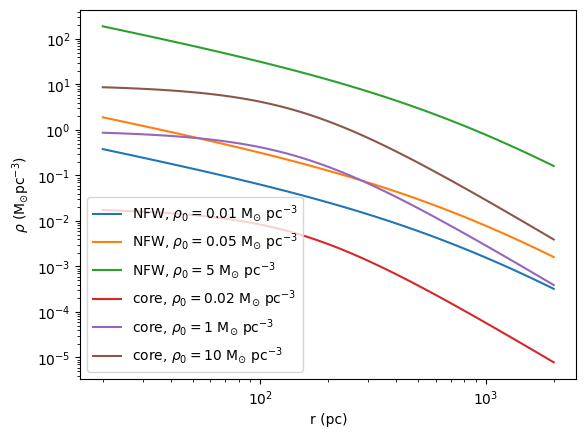

In [30]:
plt.loglog(rr*r0,NFW1.dens(rr,0),label=r'NFW, $\rho_{0}=0.01 \ \mathrm{M_{\odot}\ pc^{-3}}$')
plt.loglog(rr*r0,NFW2.dens(rr,0),label=r'NFW, $\rho_{0}=0.05 \ \mathrm{M_{\odot}\ pc^{-3}}$')
plt.loglog(rr*r0,NFW3.dens(rr,0),label=r'NFW, $\rho_{0}=5 \ \mathrm{M_{\odot}\ pc^{-3}}$')
plt.loglog(rr*r0,core1.dens(rr,0),label=r'core, $\rho_{0}=0.02 \ \mathrm{M_{\odot}\ pc^{-3}}$')
plt.loglog(rr*r0,core2.dens(rr,0),label=r'core, $\rho_{0}=1 \ \mathrm{M_{\odot}\ pc^{-3}}$')
plt.loglog(rr*r0,core3.dens(rr,0),label=r'core, $\rho_{0}=10 \ \mathrm{M_{\odot}\ pc^{-3}}$')
plt.xlabel('r (pc)')
plt.ylabel(r'$\rho \ (\mathrm{M_{\odot} pc^{-3}}$)')
plt.legend()
plt.show()

(2) Since we only have access to LOS velocities, we need the anisotropy $\beta$ to compute the velocity dispersions from the Jeans equations. Use at least 5 values of the anisotropy in the range $\beta=-10$-$1$ and compute the radial velocity dispersions with $\texttt{galpy}$. Use $\texttt{jeans.sigmar(NFW,r,beta=beta)}$ to compute $\sigma_{r}$ at a given radial distance $r$. Plot $\sigma_{r}$ vs $r$ (do not compare with the data yet).

In [15]:
beta=np.array([-5,-0.5,0,0.5,1])

In [16]:
sigs1=[]
sigs2=[]
sigs3=[]

sigs1_=[]
sigs2_=[]
sigs3_=[]

for i in beta:
    sig1=np.array([jeans.sigmar(NFW1,r,beta=i) for r in rr])/v0
    sigs1.append(sig1)

    sig2=np.array([jeans.sigmar(NFW2,r,beta=i) for r in rr])/v0
    sigs2.append(sig2)

    sig3=np.array([jeans.sigmar(NFW3,r,beta=i) for r in rr])/v0
    sigs3.append(sig3)


    sig1_= np.array([jeans.sigmar(core1,r,beta=i) for r in rr])/v0
    sigs1_.append(sig1_)

    sig2_= np.array([jeans.sigmar(core2,r,beta=i) for r in rr])/v0
    sigs2_.append(sig2_)

    sig3_= np.array([jeans.sigmar(core3,r,beta=i) for r in rr])/v0
    sigs3_.append(sig3_)
    

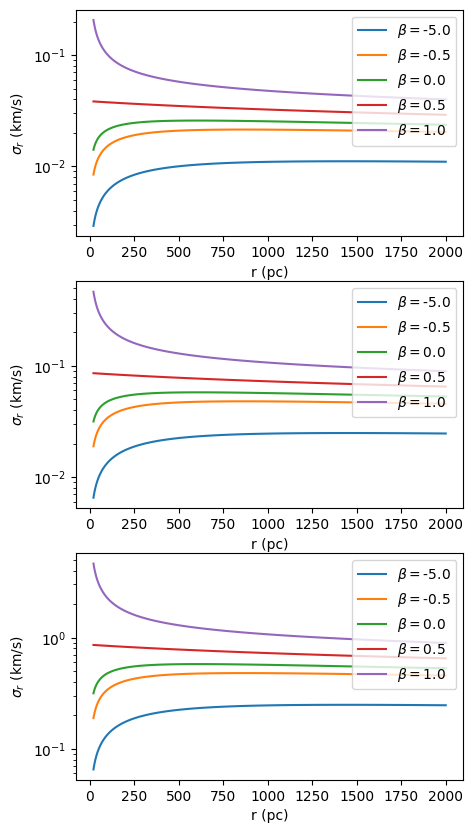

In [20]:
f,ax=plt.subplots(3,1,figsize=(5,10))
for i in range(5):
    ax[0].semilogy(rr*r0,sigs1[i],label=r'$\beta=$'+str(beta[i]))
    ax[1].semilogy(rr*r0,sigs2[i],label=r'$\beta=$'+str(beta[i]))
    ax[2].semilogy(rr*r0,sigs3[i],label=r'$\beta=$'+str(beta[i]))

for i in range(3):
    ax[i].set_xlabel('r (pc)')
    ax[i].set_ylabel(r'$\sigma_{r}\ (\mathrm{km/s}$)')
    ax[i].legend()

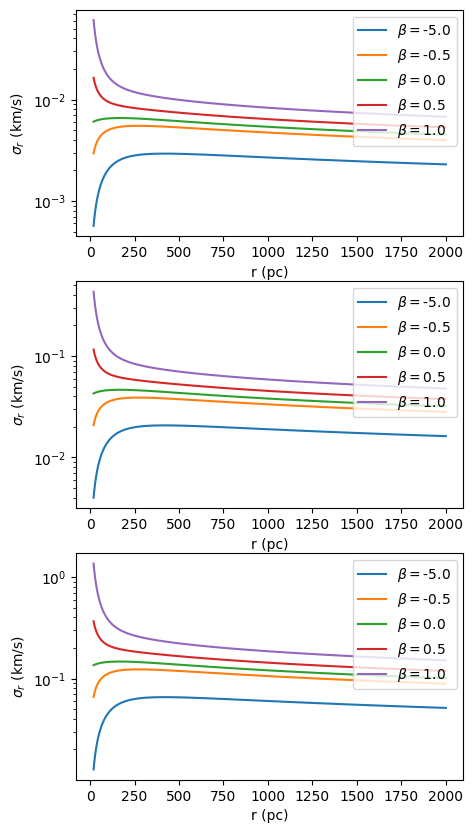

In [21]:
f,ax=plt.subplots(3,1,figsize=(5,10))
for i in range(5):
    ax[0].semilogy(rr*r0,sigs1_[i],label=r'$\beta=$'+str(beta[i]))
    ax[1].semilogy(rr*r0,sigs2_[i],label=r'$\beta=$'+str(beta[i]))
    ax[2].semilogy(rr*r0,sigs3_[i],label=r'$\beta=$'+str(beta[i]))
for i in range(3):
    ax[i].set_xlabel('r (pc)')
    ax[i].set_ylabel(r'$\sigma_{r}\ (\mathrm{km/s}$)')
    ax[i].legend()

(3) $\sigma_{r}$ is defined in an arbitrary radial position of the sky, $\beta$ contains information about the inclination of our system, and then it can be used to obtain projected $\sigma_{\mathrm{LOS}}$ that we can compare with our data. Use $\texttt{jeans.sigmalos(NFW,r,dens=nu,surfdens=I,beta=beta,sigma\_r=sig\_r}$ to compute $\sigma_{\mathrm{LOS}}$ at given distances. The densities of stars $\nu$ (dens) and $I$ (surfdens) should be functions of $r$ (use $\texttt{def\ function (r):...}$), you can use the analytical formulas given in section 3.1 of Walker et al. (2009), note that $L$ can be ignored and Table 1 lists the $r_{\mathrm{half}}$ for each galaxy. Plot the $\sigma_{\mathrm{LOS}}$ obtained with the different values of $\rho_{0}$ and $\beta$ for the two dark matter profiles and compare with your data.

In [22]:
a=221/r0 #half radius (pc) /r0

In [23]:
def nu(r):
    """3D Plummer tracer density"""
    return 3*((4*np.pi*(a**3))**-1)*((1 + r**2 / a**2)**(-5/2))

def I(r):
    """Projected Plummer surface density"""
    return ((np.pi*(a**2))**(-1))*((1 + r**2 / a**2)**(-2))

In [24]:
sigs_losp1=[]
sigs_losp2=[]
sigs_losp3=[]

sigs_losp1_=[]
sigs_losp2_=[]
sigs_losp3_=[]

for i in range(len(beta)):
    #for j in range(len(5)):
        #sig1=numpy.array([jeans.sigmar(NFW1,r,beta=i) for r in rr])/v0
        sig_losp1=np.array([jeans.sigmalos(NFW1,rr[j],dens=nu,surfdens=I,beta=beta[i],sigma_r=sigs1[i][j]) for j in range(len(sigs1[i]))])
        sigs_losp1.append(sig_losp1)

        sig_losp2=np.array([jeans.sigmalos(NFW2,rr[j],dens=nu,surfdens=I,beta=beta[i],sigma_r=sigs2[i][j]) for j in range(len(sigs2[i]))])
        sigs_losp2.append(sig_losp2)

        sig_losp3=np.array([jeans.sigmalos(NFW3,rr[j],dens=nu,surfdens=I,beta=beta[i],sigma_r=sigs3[i][j]) for j in range(len(sigs3[i]))])
        sigs_losp3.append(sig_losp3)

        sig_losp1_=np.array([jeans.sigmalos(core1,rr[j],dens=nu,surfdens=I,beta=beta[i],sigma_r=sigs1_[i][j]) for j in range(len(sigs1[i]))])
        sigs_losp1_.append(sig_losp1_)

        sig_losp2_=np.array([jeans.sigmalos(core2,rr[j],dens=nu,surfdens=I,beta=beta[i],sigma_r=sigs2_[i][j]) for j in range(len(sigs2[i]))])
        sigs_losp2_.append(sig_losp2_)

        sig_losp3_=np.array([jeans.sigmalos(core3,rr[j],dens=nu,surfdens=I,beta=beta[i],sigma_r=sigs3_[i][j]) for j in range(len(sigs3[i]))])
        sigs_losp3_.append(sig_losp3_)

In [25]:
dr_data=np.loadtxt('draco_walker2009.csv',skiprows=1,delimiter=',', unpack=True)

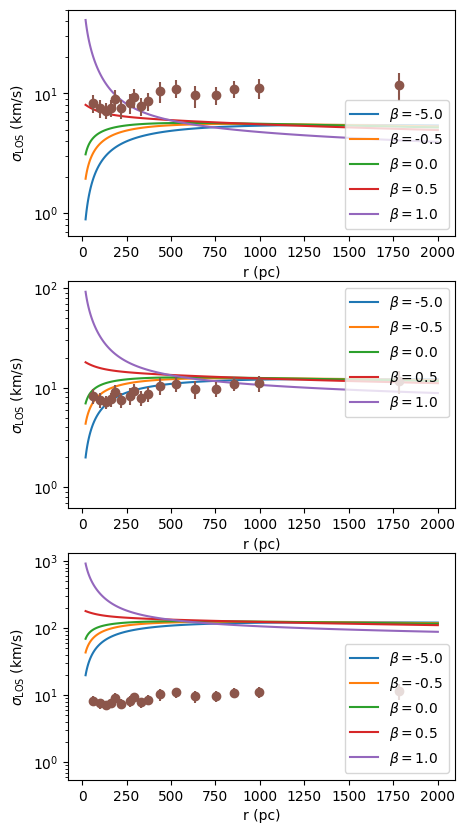

In [26]:
f,ax=plt.subplots(3,1,figsize=(5,10))
for i in range(5):
    ax[0].semilogy(rr*r0,sigs_losp1[i],label=r'$\beta=$'+str(beta[i]))
    ax[1].semilogy(rr*r0,sigs_losp2[i],label=r'$\beta=$'+str(beta[i]))
    ax[2].semilogy(rr*r0,sigs_losp3[i],label=r'$\beta=$'+str(beta[i]))

for i in range(3):
    ax[i].errorbar(dr_data[0],dr_data[1],yerr=dr_data[2],fmt='o')
    ax[i].set_xlabel('r (pc)')
    ax[i].set_ylabel(r'$\sigma_{\mathrm{LOS}}\ (\mathrm{km/s}$)')
    ax[i].legend()

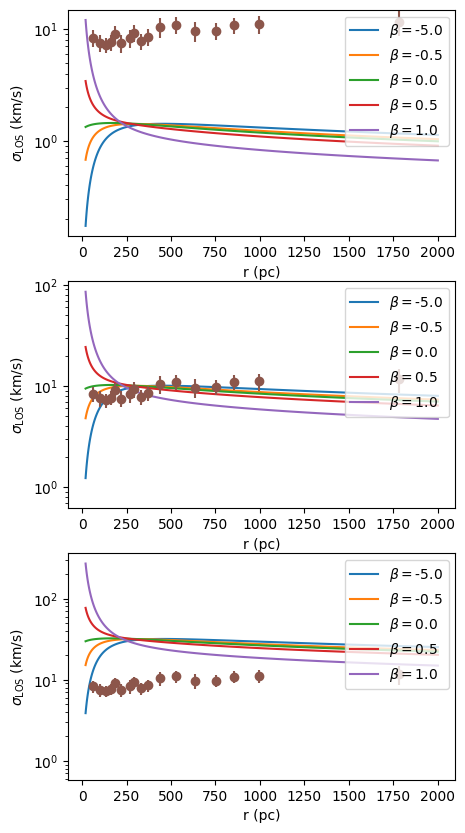

In [27]:
f,ax=plt.subplots(3,1,figsize=(5,10))
for i in range(5):
    ax[0].semilogy(rr*r0,sigs_losp1_[i],label=r'$\beta=$'+str(beta[i]))
    ax[1].semilogy(rr*r0,sigs_losp2_[i],label=r'$\beta=$'+str(beta[i]))
    ax[2].semilogy(rr*r0,sigs_losp3_[i],label=r'$\beta=$'+str(beta[i]))

for i in range(3):
    ax[i].errorbar(dr_data[0],dr_data[1],yerr=dr_data[2],fmt='o')
    ax[i].set_xlabel('r (pc)')
    ax[i].set_ylabel(r'$\sigma_{\mathrm{LOS}}\ (\mathrm{km/s}$)')
    ax[i].legend()

(4) Select your best model to compute the total mass of dark matter contained in a radius of 300 pc and $r_{\mathrm{half}}$ of your selected galaxy and compare with Table 2 of Walker et al. (2009).

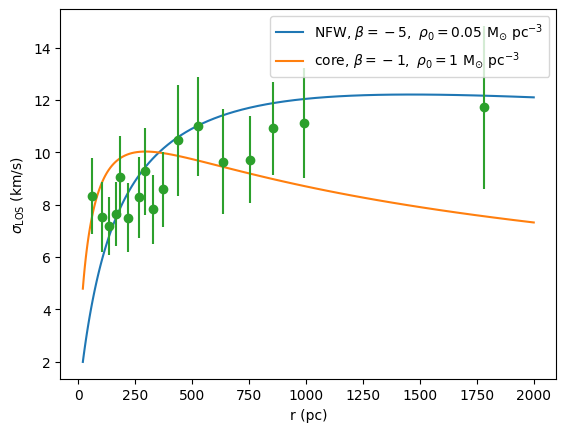

In [35]:
plt.plot(rr*r0,sigs_losp2[0],label=r'NFW, $\beta=-5,\ \rho_{0}=0.05 \ \mathrm{M_{\odot}\ pc^{-3}}$')
plt.plot(rr*r0,sigs_losp2_[1],label=r'core, $\beta=-1,\ \rho_{0}=1 \ \mathrm{M_{\odot}\ pc^{-3}}$')
plt.errorbar(dr_data[0],dr_data[1],yerr=dr_data[2],fmt='o')
plt.xlabel('r (pc)')
plt.ylabel(r'$\sigma_{\mathrm{LOS}}\ (\mathrm{km/s}$)')
plt.legend()

In [36]:
import scipy.integrate as si

In [37]:
def mass_NFW(r):
    return 4*np.pi*NFW2.dens(r/r0,0)*(r**2)
def mass_core(r):
    return 4*np.pi*core2.dens(r/r0,0)*(r**2)  

In [38]:
si.quad(mass_NFW,0,300,points=300)[0]/1e7,si.quad(mass_NFW,0,a*r0,points=300)[0]/1e7 #in 10^7 Msun

(1.4583937189357992, 0.8766107602579909)

In [39]:
si.quad(mass_core,0,300,points=300)[0]/1e7,si.quad(mass_core,0,a*r0,points=300)[0]/1e7 #in 10^7 Msun

(1.688361941247572, 1.077373655671226)